In [1]:
library(tidyverse)
library(caret)
library(repr)
library(forcats)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [2]:
install.packages("naniar")
library(naniar)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
cancer <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv")
head(cancer)
nrow(cancer)

Parsed with column specification:
cols(
  .default = col_character(),
  Age = col_double(),
  `STDs: Number of diagnosis` = col_double(),
  `Dx:Cancer` = col_double(),
  `Dx:CIN` = col_double(),
  `Dx:HPV` = col_double(),
  Dx = col_double(),
  Hinselmann = col_double(),
  Schiller = col_double(),
  Citology = col_double(),
  Biopsy = col_double()
)
See spec(...) for full column specifications.


Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,⋯,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0
15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0
34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0
52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,⋯,?,?,1,0,1,0,0,0,0,0
46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0
42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0


[1] 858

In [4]:
colnames(cancer) <- make.names(colnames(cancer))
head(cancer)
cc_data = cancer%>%
    select("Age", "Number.of.sexual.partners", "First.sexual.intercourse", "Num.of.pregnancies", "Smokes", "Smokes..years.", "Hormonal.Contraceptives", "Hormonal.Contraceptives..years.", "IUD", "IUD..years.","Dx.Cancer")
head(cc_data)

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Smokes..packs.year.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,⋯,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Dx.Cancer,Dx.CIN,Dx.HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0
15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0
34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0
52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,⋯,?,?,1,0,1,0,0,0,0,0
46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0
42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0


Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,Dx.Cancer
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
52,5.0,16.0,4.0,1.0,37.0,1.0,3.0,0.0,0.0,1
46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,0
42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:

cc_data <-  cc_data%>%
  replace_with_na_all(condition = ~.x %in% "?")
head(cc_data)
glimpse(cc_data)

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,Dx.Cancer
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
34,1.0,NA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
52,5.0,16.0,4.0,1.0,37.0,1.0,3.0,0.0,0.0,1
46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,0
42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Observations: 858
Variables: 11
$ Age                             <dbl> 18, 15, 34, 52, 46, 42, 51, 26, 45, 4…
$ Number.of.sexual.partners       <chr> "4.0", "1.0", "1.0", "5.0", "3.0", "3…
$ First.sexual.intercourse        <chr> "15.0", "14.0", NA, "16.0", "21.0", "…
$ Num.of.pregnancies              <chr> "1.0", "1.0", "1.0", "4.0", "4.0", "2…
$ Smokes                          <chr> "0.0", "0.0", "0.0", "1.0", "0.0", "0…
$ Smokes..years.                  <chr> "0.0", "0.0", "0.0", "37.0", "0.0", "…
$ Hormonal.Contraceptives         <chr> "0.0", "0.0", "0.0", "1.0", "1.0", "0…
$ Hormonal.Contraceptives..years. <chr> "0.0", "0.0", "0.0", "3.0", "15.0", "…
$ IUD                             <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "0…
$ IUD..years.                     <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "0…
$ Dx.Cancer                       <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0…


In [6]:

cc_data <- na.omit(cc_data)
head(cc_data)
glimpse(cc_data)

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,Dx.Cancer
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
52,5.0,16.0,4.0,1.0,37.0,1.0,3.0,0.0,0.0,1
46,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,0
42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
51,3.0,17.0,6.0,1.0,34.0,0.0,0.0,1.0,7.0,0


Observations: 672
Variables: 11
$ Age                             <dbl> 18, 15, 52, 46, 42, 51, 26, 45, 44, 2…
$ Number.of.sexual.partners       <chr> "4.0", "1.0", "5.0", "3.0", "3.0", "3…
$ First.sexual.intercourse        <chr> "15.0", "14.0", "16.0", "21.0", "23.0…
$ Num.of.pregnancies              <chr> "1.0", "1.0", "4.0", "4.0", "2.0", "6…
$ Smokes                          <chr> "0.0", "0.0", "1.0", "0.0", "0.0", "1…
$ Smokes..years.                  <chr> "0.0", "0.0", "37.0", "0.0", "0.0", "…
$ Hormonal.Contraceptives         <chr> "0.0", "0.0", "1.0", "1.0", "0.0", "0…
$ Hormonal.Contraceptives..years. <chr> "0.0", "0.0", "3.0", "15.0", "0.0", "…
$ IUD                             <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "1…
$ IUD..years.                     <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "7…
$ Dx.Cancer                       <dbl> 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0…


In [7]:
set.seed(1)
set_rows <- cc_data %>% 
  select("Dx.Cancer") %>% 
  unlist() %>% 
  createDataPartition(p = 0.75, list = FALSE)

training_set <- cc_data %>% slice(set_rows)
test_set <- cc_data %>% slice(-set_rows)
training_set <- mutate_if(training_set, is.character, as.factor)%>%
            mutate( Age = scale(as.numeric(Age)), 
               First.sexual.intercourse = scale (as.numeric(First.sexual.intercourse)),
               Smokes..years. = scale (as.numeric(Smokes..years.)), 
                                       Smokes..years. = scale (as.numeric(Smokes..years.)), 
                                       Hormonal.Contraceptives..years. = scale(as.numeric(Hormonal.Contraceptives..years.)),
                   IUD..years. = scale(as.numeric(IUD..years.)), Number.of.sexual.partners = scale(as.numeric(Number.of.sexual.partners)), 
                   Num.of.pregnancies = scale(as.numeric(Num.of.pregnancies)))
head(training_set)
glimpse(training_set)

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,Dx.Cancer
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>,"<dbl[,1]>",<fct>,"<dbl[,1]>",<fct>,"<dbl[,1]>",<dbl>
-1.075608,1.243429,-0.74708706,-1.1859819,0.0,-0.3513135,0.0,-0.9380401,0.0,-0.3359355,0
-1.423633,-1.103717,-1.12819220,-1.1859819,0.0,-0.3513135,0.0,-0.9380401,0.0,-0.3359355,0
2.868673,1.830215,-0.36598192,1.0679203,1.0,3.1329120,1.0,1.2384048,0.0,-0.3359355,1
2.172623,0.656642,1.53954379,1.0679203,0.0,-0.3513135,1.0,0.5935323,0.0,-0.3359355,0
1.708590,0.656642,2.30175407,0.1663594,0.0,-0.3513135,0.0,-0.9380401,0.0,-0.3359355,0
2.752665,0.656642,0.01512322,1.9694812,1.0,2.9745381,0.0,-0.9380401,1.0,3.7368494,0


Observations: 504
Variables: 11
$ Age                             <dbl[,1]> <matrix[26 x 1]>
$ Number.of.sexual.partners       <dbl[,1]> <matrix[26 x 1]>
$ First.sexual.intercourse        <dbl[,1]> <matrix[26 x 1]>
$ Num.of.pregnancies              <dbl[,1]> <matrix[26 x 1]>
$ Smokes                          <fct> 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.…
$ Smokes..years.                  <dbl[,1]> <matrix[26 x 1]>
$ Hormonal.Contraceptives         <fct> 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.…
$ Hormonal.Contraceptives..years. <dbl[,1]> <matrix[26 x 1]>
$ IUD                             <fct> 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.…
$ IUD..years.                     <dbl[,1]> <matrix[26 x 1]>
$ Dx.Cancer                       <dbl> 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0…


Warning message:
“attributes are not identical across measure variables;
they will be dropped”

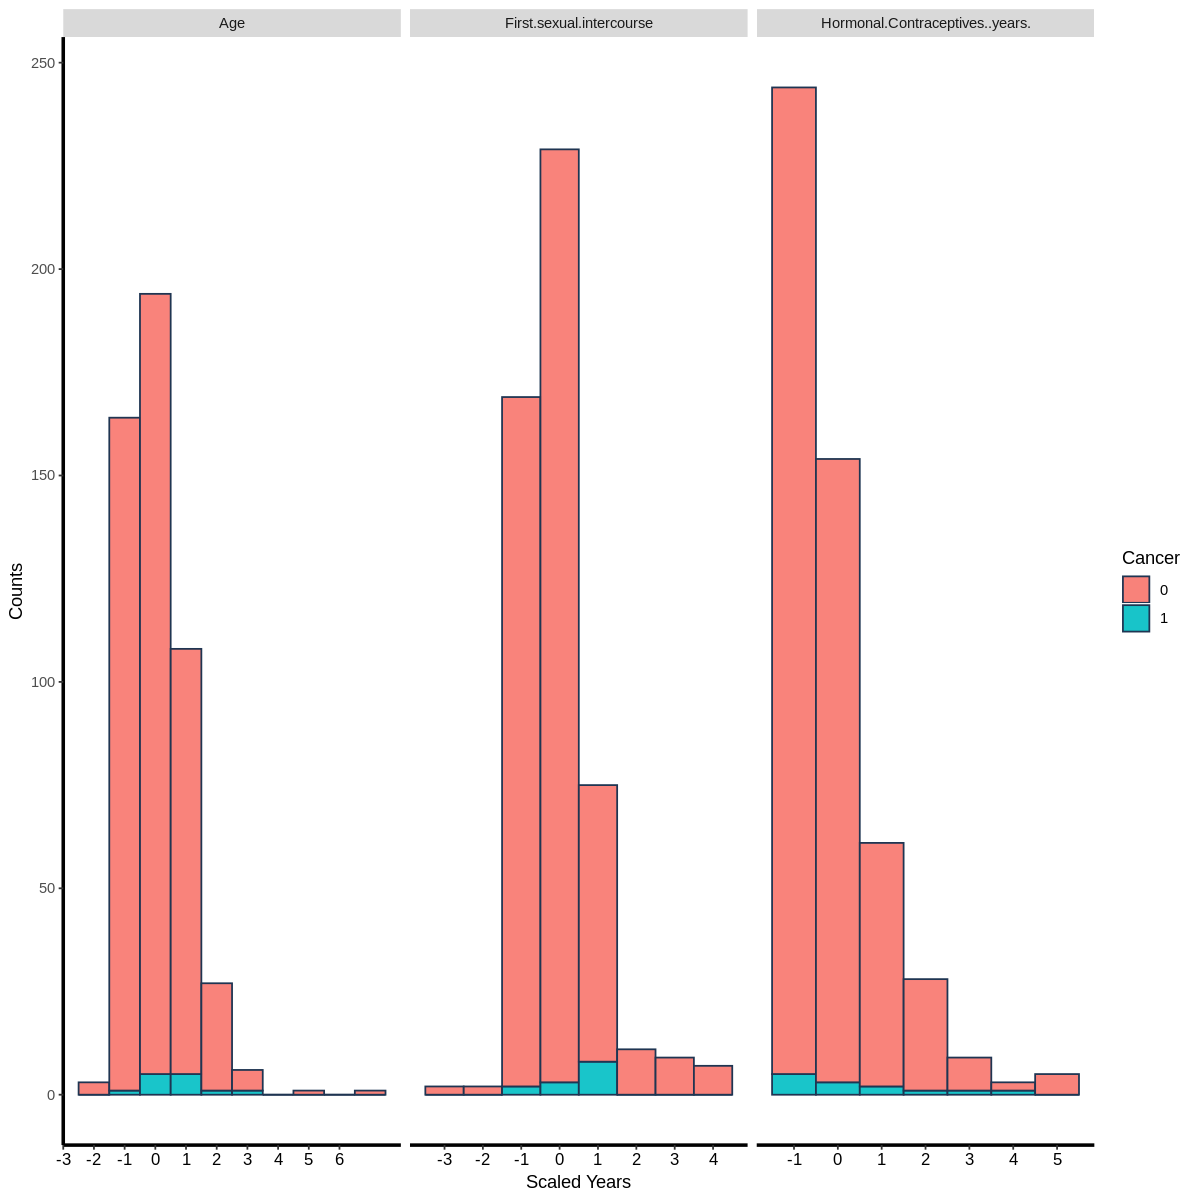

In [15]:
set.seed(1)
set_rows <- cc_data %>% 
  select("Dx.Cancer") %>% 
  unlist() %>% 
  createDataPartition(p = 0.75, list = FALSE)

training_set <- cc_data %>% slice(set_rows)
test_set <- cc_data %>% slice(-set_rows)

cc_data_scaled = training_set%>%
               mutate( Age = scale(as.numeric(Age)), 
               First.sexual.intercourse = scale (as.numeric(First.sexual.intercourse)),
               Smokes..years. = scale (as.numeric(Smokes..years.)), 
                                       Smokes..years. = scale (as.numeric(Smokes..years.)), 
                                       Hormonal.Contraceptives..years. = scale(as.numeric(Hormonal.Contraceptives..years.)),
                   IUD..years. = scale(as.numeric(IUD..years.)), 
                                                                                                                                   
                   Dx.Cancer = (Dx.Cancer))

cc_data_scaled2 = cc_data_scaled %>%
            select("Age", "First.sexual.intercourse", #"Smokes..years.", 
                   "Hormonal.Contraceptives..years.",#"IUD..years.",
                   "Dx.Cancer")%>%
                 
                      gather(key = Predictors, value = Value, -Dx.Cancer)
            #group_by(Age, First.sexual.intercourse, Smokes..years., Hormonal.Contraceptives..years.)
options(repr.plot.height = 10, repr.plot.width = 10)

cc_data_plot = cc_data_scaled2%>%
                 ggplot( aes(x= Value, fill = factor(Dx.Cancer))) +
    geom_histogram( binwidth = 1 , color= "#1F3552", alpha=0.9) +
        scale_x_continuous( name= "Scaled Years" , breaks = seq(-3, 6, 1))+ 
            scale_y_continuous(name = "Counts") +
    # coord_flip()+
        theme(axis.text.x=element_text(colour="black", size = 10), 
             
              panel.border = element_blank(), panel.background = element_blank(),
             axis.line = element_line(size=1, colour = "black"))+
            labs(fill = "Cancer")+
                                  facet_grid(~Predictors  , scales = "free") 

cc_data_plot


Warning message:
“attributes are not identical across measure variables;
they will be dropped”

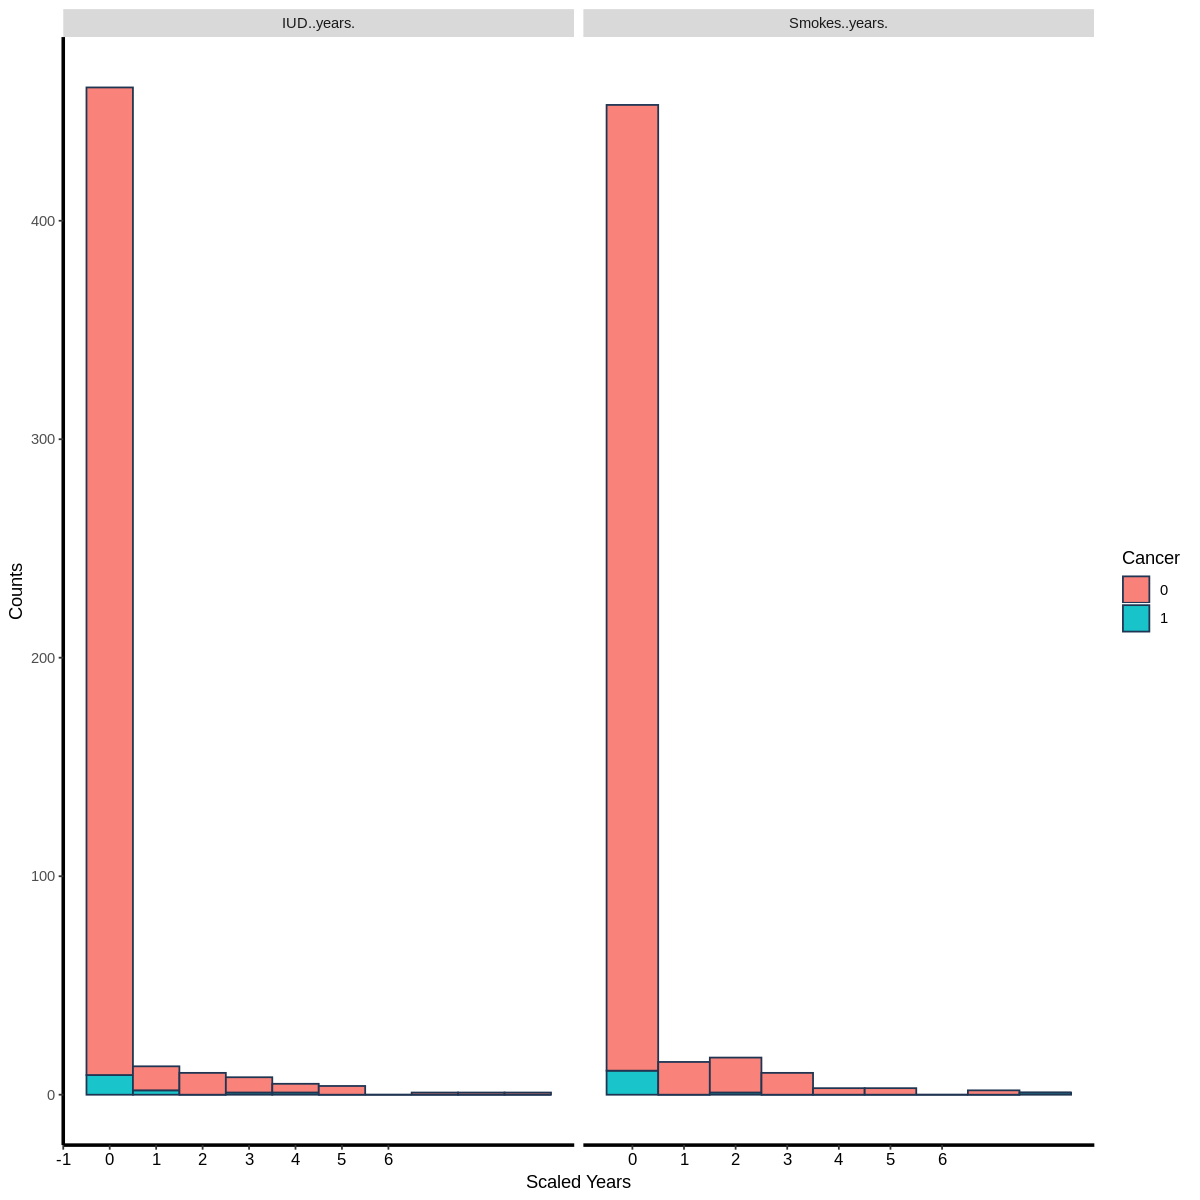

In [16]:
cc_data_scaled3 = cc_data_scaled %>%
            select("Smokes..years.", 
                   "IUD..years.",
                   "Dx.Cancer")%>%
                 
                      gather(key = Predictors, value = Value, -Dx.Cancer)
            #group_by(Age, First.sexual.intercourse, Smokes..years., Hormonal.Contraceptives..years.)
options(repr.plot.height = 10, repr.plot.width = 10)

cc_data_plot = cc_data_scaled3%>%
                 ggplot( aes(x= Value, fill = factor(Dx.Cancer))) +
    geom_histogram( binwidth = 1 , color= "#1F3552", alpha=0.9) +
        scale_x_continuous( name= "Scaled Years" , breaks = seq(-3, 6, 1))+ 
            scale_y_continuous(name = "Counts") +
    # coord_flip()+
        theme(axis.text.x=element_text(colour="black", size = 10), 
             
              panel.border = element_blank(), panel.background = element_blank(),
             axis.line = element_line(size=1, colour = "black"))+
            labs(fill = "Cancer")+
                                  facet_grid(~Predictors  , scales = "free") 

cc_data_plot

Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”

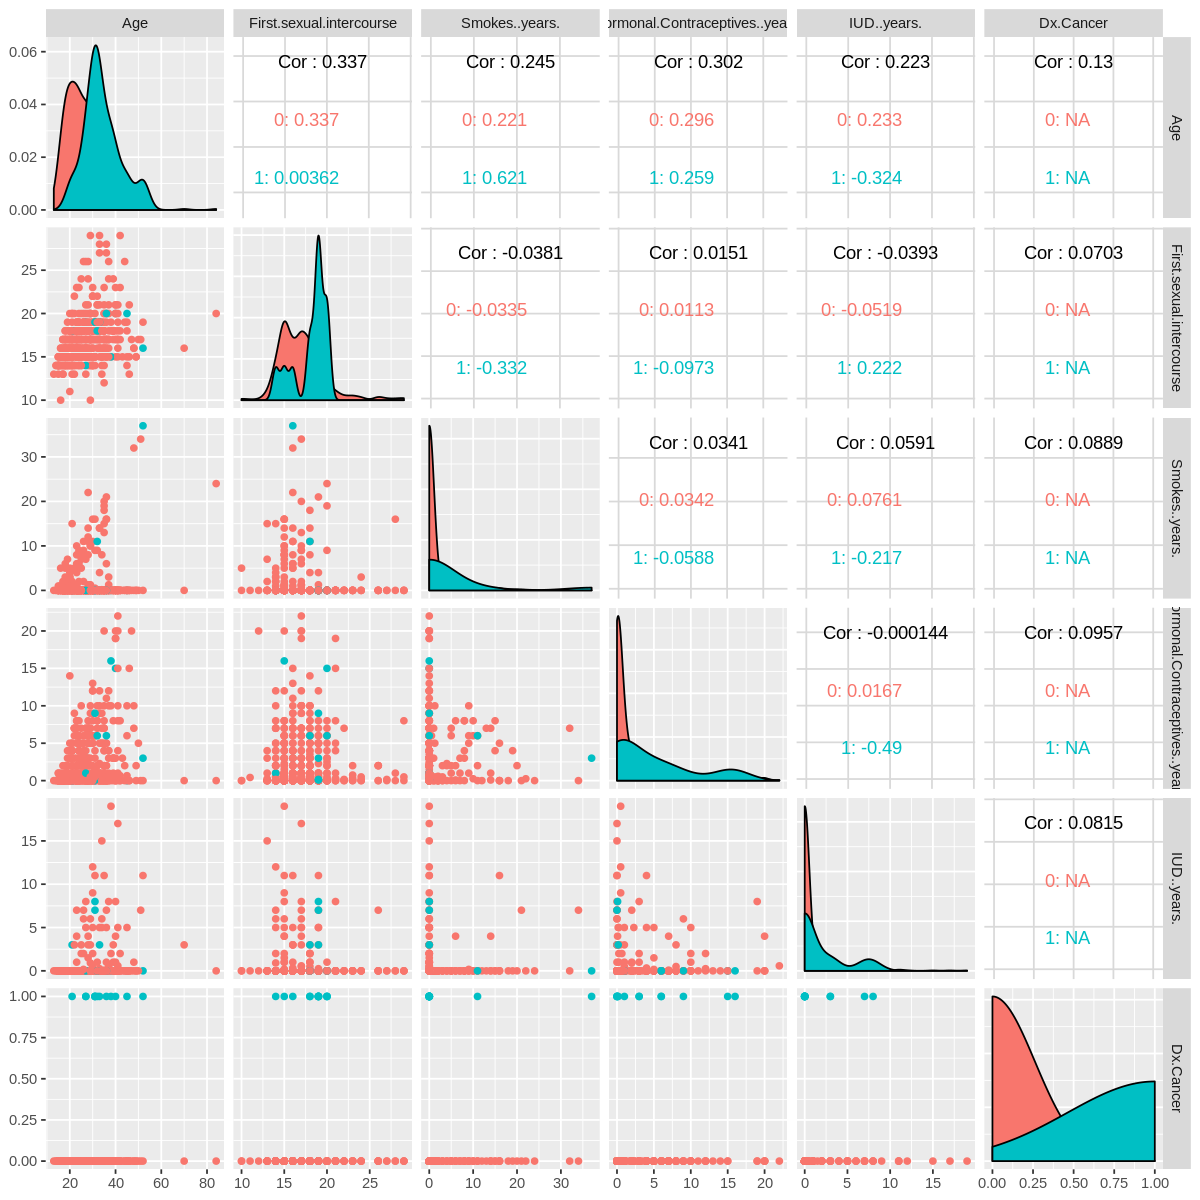

In [17]:

 training_set2= training_set%>%
               mutate( Age = as.numeric(Age), 
               First.sexual.intercourse = as.numeric(First.sexual.intercourse),
               Smokes..years. = as.numeric(Smokes..years.), 
                                       Smokes..years. =  as.numeric(Smokes..years.), 
                                       Hormonal.Contraceptives..years. = as.numeric(Hormonal.Contraceptives..years.),
                   IUD..years. = as.numeric(IUD..years.), Dx.Cancer = as.numeric(Dx.Cancer))%>%
        select("Age", "First.sexual.intercourse", "Smokes..years.", 
                   "Hormonal.Contraceptives..years.", "IUD..years.",
                   "Dx.Cancer")
pairs_plot = ggpairs(training_set2, upper = list(continuous = "cor", combo = "box_no_facet", discrete =
  "facetbar", na = "na"), aes(  color = as.factor(Dx.Cancer)))
pairs_plot



In [ ]:
options(repr.plot.height = 5, repr.plot.width = 10)
plot <-  ggplot(cc_data, aes(x= Age, fill = factor(Biopsy))) +
    geom_histogram( binwidth= 2 , color="#e9ecef", alpha=0.9) +
     scale_x_continuous(name = "Age",
                           breaks = seq(0, 90, 2))+
       # scale_y_continuous(name = "Count", breaks = seq(0, 35, 2))+ 
       theme(axis.text.x=element_text(colour="black", size = 10))
                                
   
plot

In [ ]:
training_set <- mutate_if(training_set, is.character, as.factor)
table <- training_set %>%
    select(Age, Number.of.sexual.partners, First.sexual.intercourse, Num.of.pregnancies, Smokes..years., 
           Hormonal.Contraceptives..years., IUD..years.) %>%
    gather(key = Predictor, value = Measurement) %>%
    group_by(Predictor) %>%
    summarize(Min = min(Measurement, na.rm = TRUE),
             Max = max(Measurement, na.rm = TRUE),
             Mean = mean(Measurement, na.rm = TRUE),N  = n())
